# Infrastructure

In [178]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
import pydotplus

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

import imbalanced_classifier_functions

In [179]:
size_no = 1000
size_yes = 100
size_total = size_no + size_yes

In [180]:
random_seed = 12345
np.random.seed(random_seed)

In [181]:
current_palette = sns.color_palette()

## Data 1

The first dataset is a large `no` with the `yes` observations at the right side. There is some overlap, but there are X values for which the `yes` is in majority.

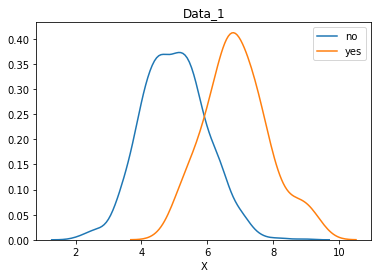

In [182]:
np.random.seed(random_seed)

X_no = np.random.normal(loc = 5, scale = 1, size = size_no)
X_yes = np.random.normal(loc = 7, scale = 1, size = size_yes)
y_no = np.zeros(len(X_no))
y_yes = np.ones(len(X_yes))

X = np.concatenate((X_no, X_yes)).reshape(-1,1)
y = np.concatenate((y_no, y_yes))

sns.distplot(X_no, hist = False , label = 'no')
sns.distplot(X_yes, hist = False , label = 'yes')
plt.title('Data_1')
plt.xlabel('X')
plt.legend()
plt.savefig('./charts/data_1_kde.png')
plt.show()

sns.distplot(X_no, hist = True , kde=False, bins = 20, label = 'no')
sns.distplot(X_yes, hist = True , kde=False, bins = 20,  label = 'yes')
plt.title('Data_1')
plt.xlabel('X')
plt.legend()
plt.savefig('./charts/data_1_hist.png')
plt.show()

## Data 2

In the second dataset, the `no` population is the same as before, but the `yes` values are in the middle of the larger `no` population. In order to build a meaningful model, we will transform the data and in the X array we will save the original X values' absolute difference from 5, which is the expected value of both `no` and `yes` populations.

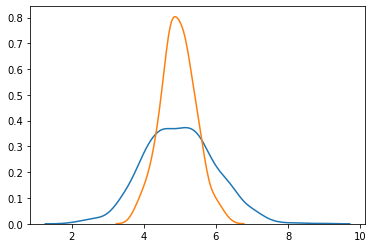

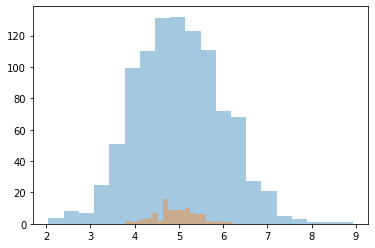

In [183]:
X_yes_2_unadjusted = np.random.normal(loc = 5, scale = 0.5, size = size_yes)
X_2_unadjusted = np.concatenate((X_no, X_yes_2_unadjusted)).reshape(-1,1)

sns.distplot(X_no, hist = False )
sns.distplot(X_yes_2_unadjusted, hist = False )
plt.show()

sns.distplot(X_no, hist = True , kde=False, bins = 20)
sns.distplot(X_yes_2_unadjusted, hist = True , kde = False, bins = 20)
plt.show()

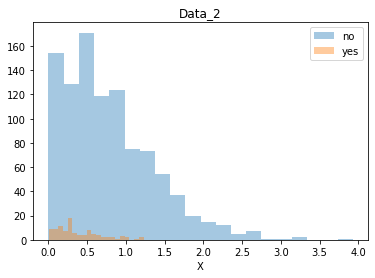

In [184]:
X_yes_2 = np.abs(X_yes_2_unadjusted - 5)
X_no_2 = np.abs(X_no - 5)

X_2 = np.concatenate((X_no_2, X_yes_2)).reshape(-1,1)

sns.distplot(X_no_2, hist = False , label = 'no')
sns.distplot(X_yes_2, hist = False , label = 'yes')
plt.title('Data_2')
plt.xlabel('X')
plt.legend()
plt.savefig('./charts/data_2_kde.png')
plt.show()

sns.distplot(X_no_2, hist = True , kde=False, bins = 20, label = 'no')
sns.distplot(X_yes_2, hist = True , kde=False, bins = 20,  label = 'yes')
plt.title('Data_2')
plt.xlabel('X')
plt.legend()
plt.savefig('./charts/data_2_hist.png')
plt.show()

# Manual Model

In this section, we calculate the optimal split by `accuracy` and `balanced_accuracy`. The rule is assumed to be one decision-tree-like split: we define a value on the X coordinate, everything above is classified as `yes`, and everything below is classified as `no`. 

## Data 1

In [185]:
possible_thresholds = np.sort(X, axis = 0)

In [186]:
manual_number_of_TN, manual_number_of_FN, manual_number_of_TP, manual_number_of_FP = \
    imbalanced_classifier_functions.return_manual_number_of_confusion_matrix_elements(
    possible_thresholds, X_no, X_yes, True
)

In [187]:
plt.plot(manual_number_of_TN, label = 'True Negatives')
plt.plot(manual_number_of_FN, label = 'False Negatives')
plt.plot(manual_number_of_TP, label = 'True Positives')
plt.plot(manual_number_of_FP, label = 'False Positives')
plt.title('Confusion Matrix Elements by Split')
plt.legend()
plt.show()

In [188]:
manual_accuracy = (manual_number_of_TN + manual_number_of_TP) / size_total
chosen_accuracy_threshold_manual = possible_thresholds[np.argmax(manual_accuracy)][0]
chosen_accuracy_threshold_manual

7.300740002905247

In [189]:
np.max(manual_accuracy)

0.9345454545454546

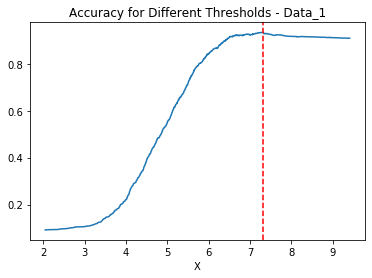

In [190]:
plt.plot(possible_thresholds,manual_accuracy)
plt.axvline(chosen_accuracy_threshold_manual, color = 'r', 
            linestyle = '--', label = 'Maximum Accuracy')
plt.title('Accuracy for Different Thresholds - Data_1')
plt.xlabel('X')
plt.savefig('./charts/data_1_accuracy_max')
plt.show()

In [282]:
# balanced accuracy at max accuracy:
manual_balanced_accuracy[np.argmax(manual_accuracy)]

0.6715

In [191]:
tn, fn, fp, tp = imbalanced_classifier_functions.return_manual_confusion_matrix(
    chosen_accuracy_threshold_manual, X_no, X_yes, True)
tn, fn, fp, tp

(993, 65, 7, 35)

In [192]:
manual_balanced_accuracy = ((manual_number_of_TN / size_no) + (manual_number_of_TP / size_yes)) / 2
chosen_balanced_accuracy_threshold_manual = possible_thresholds[np.argmax(manual_balanced_accuracy)][0]
chosen_balanced_accuracy_threshold_manual

5.871600313906792

In [193]:
np.max(manual_balanced_accuracy)

0.8425

In [283]:
#  accuracy at max balanced accuracy:
manual_accuracy[np.argmax(manual_balanced_accuracy)]

0.82

In [194]:
plt.plot(possible_thresholds, manual_balanced_accuracy)
plt.axvline(chosen_balanced_accuracy_threshold_manual, color = 'g', 
            linestyle = '--', label = 'Maximum Balanced Accuracy')
plt.title('Balanced Accuracy for Different Thresholds - Data_1')
plt.xlabel('X')
plt.savefig('./charts/data_1_balanced_accuracy_max')
plt.show()

In [195]:
tn, fn, fp, tp = imbalanced_classifier_functions.return_manual_confusion_matrix(
    chosen_balanced_accuracy_threshold_manual, X_no, X_yes, True)
tn, fn, fp, tp

(815, 13, 185, 87)

In [196]:
plt.figure(figsize = (10,5))
sns.distplot(X_no, hist = False , label = 'no')
sns.distplot(X_yes, hist = False , label = 'yes')
plt.axvline(chosen_accuracy_threshold_manual, label = 'accuracy threshold', 
            c = 'r', linestyle = '--')
plt.axvline(chosen_balanced_accuracy_threshold_manual, label = 'balanced accuracy threshold', 
            c = 'g', linestyle = '--')

plt.xlim([0,11])

plt.xlabel('X')

plt.title('Data_1 With Optimal Thresholds')

plt.legend()

plt.savefig('./charts/data_1_optimal_with_kde')

plt.show()

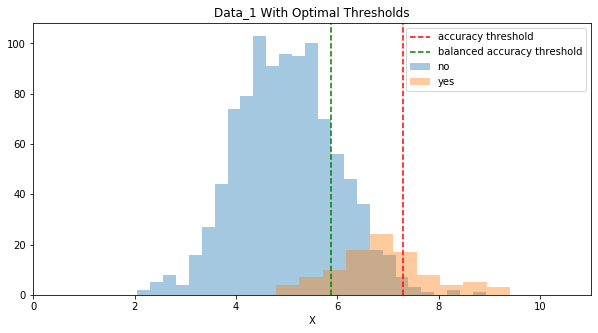

In [197]:
plt.figure(figsize = (10,5))
sns.distplot(X_no, hist = True, kde = False, label = 'no')
sns.distplot(X_yes, hist = True, kde = False, label = 'yes')
plt.axvline(chosen_accuracy_threshold_manual, label = 'accuracy threshold', 
            c = 'r', linestyle = '--')
plt.axvline(chosen_balanced_accuracy_threshold_manual, label = 'balanced accuracy threshold', 
            c = 'g', linestyle = '--')

plt.xlim([0,11])

plt.xlabel('X')

plt.title('Data_1 With Optimal Thresholds')

plt.legend()

plt.savefig('./charts/data_1_optimal_with_histograms')

plt.show()

## Data 2

In [198]:
possible_thresholds_2 = np.sort(X_2, axis = 0)

In [199]:
manual_number_of_TN_2, manual_number_of_FN_2, manual_number_of_TP_2, manual_number_of_FP_2 = \
    imbalanced_classifier_functions.return_manual_number_of_confusion_matrix_elements(
    possible_thresholds_2, X_no_2, X_yes_2, yes_above_threshold =False
    )

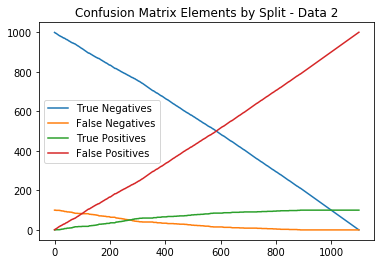

In [200]:
plt.plot(manual_number_of_TN_2, label = 'True Negatives')
plt.plot(manual_number_of_FN_2, label = 'False Negatives')
plt.plot(manual_number_of_TP_2, label = 'True Positives')
plt.plot(manual_number_of_FP_2, label = 'False Positives')
plt.title('Confusion Matrix Elements by Split - Data 2')
plt.legend()
plt.show()

In [201]:
manual_accuracy_2 = (manual_number_of_TN_2 + manual_number_of_TP_2) / size_total
chosen_accuracy_threshold_manual_2 = possible_thresholds_2[np.argmax(manual_accuracy_2)][0]
chosen_accuracy_threshold_manual_2

0.0002272887041732119

In [202]:
np.max(manual_accuracy_2)

0.9081818181818182

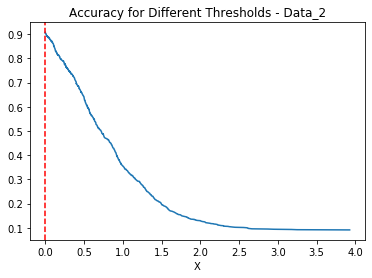

In [203]:
plt.plot(possible_thresholds_2,manual_accuracy_2)
plt.axvline(chosen_accuracy_threshold_manual_2, color = 'r', 
            linestyle = '--', label = 'Maximum Accuracy')
plt.title('Accuracy for Different Thresholds - Data_2')
plt.xlabel('X')
plt.savefig('./charts/data_2_accuracy_max')
plt.show()

Optimal threshold for balanced accuracy: 0.6363638548283452


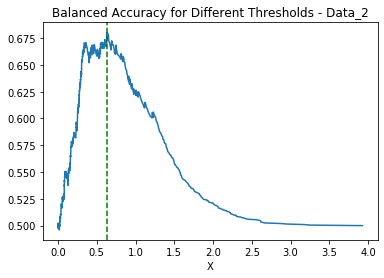

In [204]:
manual_balanced_accuracy_2 = ((manual_number_of_TN_2 / size_no) + (manual_number_of_TP_2 / size_yes)) / 2
chosen_balanced_accuracy_threshold_manual_2 = possible_thresholds_2[np.argmax(manual_balanced_accuracy_2)][0]
print("Optimal threshold for balanced accuracy: " + str(chosen_balanced_accuracy_threshold_manual_2))

plt.plot(possible_thresholds_2, manual_balanced_accuracy_2)
plt.axvline(chosen_balanced_accuracy_threshold_manual_2, color = 'g', 
            linestyle = '--', label = 'Maximum Balanced Accuracy')
plt.title('Balanced Accuracy for Different Thresholds - Data_2')
plt.xlabel('X')
plt.savefig('./charts/data_2_balanced_accuracy_max')
plt.show()

In [205]:
np.max(manual_balanced_accuracy_2)

0.6805

In [206]:
tn, fn, fp, tp = imbalanced_classifier_functions.return_manual_confusion_matrix(
    chosen_balanced_accuracy_threshold_manual_2, X_no_2, X_yes_2, False
    )
tn, fn, fp, tp

(511, 15, 489, 85)

In [207]:
plt.figure(figsize = (10,5))
sns.distplot(X_no_2, hist = False , label = 'no')
sns.distplot(X_yes_2, hist = False , label = 'yes')
plt.axvline(chosen_accuracy_threshold_manual_2, label = 'accuracy threshold', 
            c = 'r', linestyle = '--')
plt.axvline(chosen_balanced_accuracy_threshold_manual_2, label = 'balanced accuracy threshold', 
            c = 'g', linestyle = '--')

plt.xlim([-0.1,4])

plt.xlabel('X')

plt.title('Data_2 With Optimal Thresholds')

plt.legend()

plt.savefig('./charts/data_2_optimal_with_kde')

plt.show()

In [208]:
plt.figure(figsize = (10,5))
sns.distplot(X_no_2, hist = True, kde = False, label = 'no')
sns.distplot(X_yes_2, hist = True, kde = False, label = 'yes')
plt.axvline(chosen_accuracy_threshold_manual_2, label = 'accuracy threshold', 
            c = 'r', linestyle = '--')
plt.axvline(chosen_balanced_accuracy_threshold_manual_2, label = 'balanced accuracy threshold', 
            c = 'g', linestyle = '--')

plt.xlim([-0.1,4])

plt.xlabel('X')

plt.title('Data_2 With Optimal Thresholds')

plt.legend()

plt.savefig('./charts/data_2_optimal_with_histograms')

plt.show()

# Logistic Regression without Sampling Techniques

In [209]:
# prob = 1 / (1 + exp (-z))
# 1 / prob = 1 + exp(-z)
# log(1 / prob - 1) = -z = -intercept - coef * X
# (log(1 / prob - 1) + intercept) / -coef = * X

In [210]:
def get_X_from_logreg(coef, intercept, probability):
    return (np.log(1 / probability - 1) + intercept) / (-coef)

## Data 1

In [211]:
logreg1 = LogisticRegression()
logreg1.fit(X, y)
y_logreg1_predict = logreg1.predict(X)
confusion_matrix(y, y_logreg1_predict)

array([[986,  14],
       [ 64,  36]])

In [212]:
logreg1_coef = logreg1.coef_[0][0]
logreg1_coef

1.8652435589654144

In [213]:
logreg1_intercept = logreg1.intercept_[0]
logreg1_intercept

-13.348781359487099

In [214]:
get_X_from_logreg(logreg1_coef, logreg1_intercept, 0.5)

7.156588905146094

In [215]:
accuracy_score(y, y_logreg1_predict)

0.9290909090909091

In [284]:
balanced_accuracy_score(y, y_logreg1_predict)

0.673

In [216]:
chart_prob_logreg1 = logreg1.predict_proba(possible_thresholds)[:,1]

In [217]:
logreg2 = LogisticRegression(class_weight = {0:1, 1:10})
logreg2.fit(X, y)
y_logreg2_predict = logreg2.predict(X)
confusion_matrix(y, y_logreg2_predict)

array([[834, 166],
       [ 16,  84]])

In [218]:
get_X_from_logreg(logreg2.coef_[0][0], logreg2.intercept_[0], 0.5)

5.942893519398901

In [285]:
accuracy_score(y, y_logreg2_predict)

0.8345454545454546

In [219]:
balanced_accuracy_score(y, y_logreg2_predict)

0.837

In [220]:
chart_prob_logreg2 = logreg2.predict_proba(possible_thresholds)[:,1]

In [221]:
plt.figure(figsize = (10,5))
sns.distplot(X_no, hist = False , label = 'no')
sns.distplot(X_yes, hist = False , label = 'yes')
plt.plot(possible_thresholds, chart_prob_logreg1, color = 'r', label = 'baseline logreg')
plt.plot(possible_thresholds, chart_prob_logreg2, color = 'g', label = 'class weighted logreg')
plt.axvline(get_X_from_logreg(logreg1_coef, logreg1_intercept, 0.5), color = 'r')
plt.axvline(get_X_from_logreg(logreg2.coef_[0][0], logreg2.intercept_[0], 0.5), color = 'g')
plt.axhline(0.5, linestyle = ':')
plt.legend()
plt.xlabel('X')
plt.title('Logistic Regression Predicted Probabilities - Data_1')
plt.savefig('./charts/data_1_nonsampled_logregs')
plt.show()

## Data 2

In [222]:
logreg1_2 = LogisticRegression()
logreg1_2.fit(X_2, y)
y_logreg1_2_predict = logreg1_2.predict(X_2)
confusion_matrix(y, y_logreg1_2_predict)

array([[1000,    0],
       [ 100,    0]])

In [223]:
get_X_from_logreg(logreg1_2.coef_[0][0], logreg1_2.intercept_[0], 0.5)

-0.6623680634214403

In [224]:
accuracy_score(y, y_logreg1_2_predict)

0.9090909090909091

In [225]:
chart_prob_logreg1_2 = logreg1_2.predict_proba(possible_thresholds_2)[:,1]

In [226]:
logreg2_2 = LogisticRegression(class_weight = 'balanced')
logreg2_2.fit(X_2, y)
y_logreg2_2_predict = logreg2_2.predict(X_2)
confusion_matrix(y, y_logreg2_2_predict)

array([[583, 417],
       [ 26,  74]])

In [227]:
get_X_from_logreg(logreg2_2.coef_[0][0], logreg2_2.intercept_[0], 0.5)

0.5460361143002003

In [228]:
balanced_accuracy_score(y, y_logreg2_2_predict)

0.6615

In [229]:
chart_prob_logreg2_2 = logreg2_2.predict_proba(possible_thresholds_2)[:,1]

In [230]:
plt.figure(figsize = (10,5))
sns.distplot(X_no_2, hist = False , label = 'no')
sns.distplot(X_yes_2, hist = False , label = 'yes')
plt.plot(possible_thresholds_2, chart_prob_logreg1_2, color = 'r', label = 'baseline logreg')
plt.plot(possible_thresholds_2, chart_prob_logreg2_2, color = 'g', label = 'class weighted logreg')
plt.axvline(get_X_from_logreg(logreg1_2.coef_[0][0], logreg1_2.intercept_[0], 0.5), color = 'r')
plt.axvline(get_X_from_logreg(logreg2_2.coef_[0][0], logreg2_2.intercept_[0], 0.5), color = 'g')
plt.axhline(0.5, linestyle = ':')
plt.legend()
plt.xlabel('X')
plt.title('Logistic Regression Predicted Probabilities - Data_2')
plt.savefig('./charts/data_2_nonsampled_logregs')
plt.show()

# Sampling Techniques

## Data 1

In [231]:
data = np.concatenate((X, y.reshape(-1,1)), axis = 1)
data_yes = data[data[:,1]==1]
data_no = data[data[:,1]==0]

data_yes_oversampled = resample(data_yes, replace = True, n_samples = len(data_no), random_state = random_seed)

data_no_undersampled = resample(data_no, replace = True, n_samples = len(data_yes), random_state = random_seed)

In [232]:
data_oversampled = np.concatenate((data_no, data_yes_oversampled))
X_oversampled = data_oversampled[:,0].reshape(-1,1)
y_oversampled = data_oversampled[:,1]

In [233]:
data_undersampled = np.concatenate((data_no_undersampled, data_yes))
X_undersampled = data_undersampled[:,0].reshape(-1,1)
y_undersampled = data_undersampled[:,1]

In [234]:
data_manual_oversampled = np.concatenate((data_no, data_yes))
for i in range(1, 9 + 1):
    data_manual_oversampled = np.concatenate((data_manual_oversampled, data_yes))

X_manual_oversampled = data_manual_oversampled[:,0].reshape(-1,1)
y_manual_oversampled = data_manual_oversampled[:,1]

In [235]:
smote = SMOTE(random_state = random_seed)

In [236]:
X_smote, y_smote = smote.fit_sample(X, y)

In [237]:
data_smote = np.concatenate((X_smote, y_smote.reshape(-1,1)), axis = 1)
data_yes_smote = data_smote[data_smote[:,1]==1]
data_no_smote = data_smote[data_smote[:,1]==0]

In [238]:
np.sort(data_yes[:,0])[:20]

array([4.78686675, 5.13065935, 5.16984374, 5.23962831, 5.27971514,
       5.30568751, 5.31667483, 5.46884864, 5.55720785, 5.57742467,
       5.63857198, 5.73865621, 5.81337722, 5.87683519, 5.9022681 ,
       5.92088892, 5.96557684, 5.97161119, 6.00105164, 6.01649528])

In [239]:
np.sort(data_yes_oversampled[:,0])[:20]

array([4.78686675, 4.78686675, 4.78686675, 4.78686675, 4.78686675,
       4.78686675, 4.78686675, 4.78686675, 4.78686675, 4.78686675,
       4.78686675, 4.78686675, 4.78686675, 4.78686675, 5.13065935,
       5.13065935, 5.13065935, 5.13065935, 5.13065935, 5.13065935])

In [240]:
np.sort(data_yes_smote[:,0])[:20]

array([4.78686675, 4.81446713, 4.82864615, 4.85628325, 4.94624546,
       5.00124146, 5.02037642, 5.04086545, 5.12494108, 5.13065935,
       5.13206745, 5.14651878, 5.14676502, 5.15036478, 5.15318469,
       5.15808186, 5.16405955, 5.16823429, 5.16906316, 5.16984374])

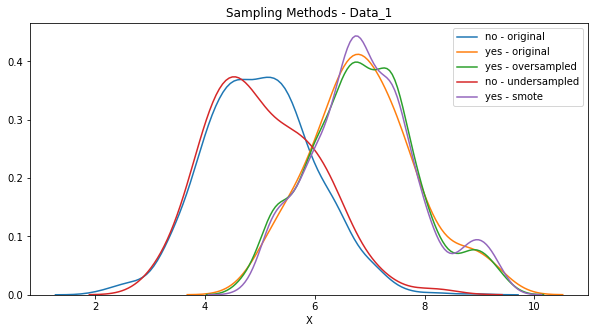

In [241]:
plt.figure(figsize = (10,5))
sns.distplot(X_no, hist = False , label = 'no - original')
sns.distplot(X_yes, hist = False , label = 'yes - original')
sns.distplot(data_yes_oversampled[:,0], hist = False , label = 'yes - oversampled')
sns.distplot(data_no_undersampled[:,0], hist = False , label = 'no - undersampled')
sns.distplot(data_yes_smote[:,0], hist = False , label = 'yes - smote')
plt.xlabel('X')
plt.title('Sampling Methods - Data_1')
plt.savefig('./charts/data_1_sampling_methods')
plt.show()

## Data 2

In [242]:
X_smote2, y_smote2 = smote.fit_sample(X_2, y)
data_smote2 = np.concatenate((X_smote2, y_smote2.reshape(-1,1)), axis = 1)
data_yes_smote2 = data_smote2[data_smote2[:,1]==1]
data_no_smote2 = data_smote2[data_smote2[:,1]==0]

In [243]:
data2 = np.concatenate((X_2, y.reshape(-1,1)), axis = 1)
data_yes2 = data2[data2[:,1]==1]
data_no2 = data2[data2[:,1]==0]

data_no_undersampled2 = resample(data_no2, replace = True, n_samples = len(data_yes2), random_state = random_seed)


data_yes_oversampled2 = resample(data_yes2, replace = True, n_samples = len(data_no2), random_state = random_seed)


data_undersampled2 = np.concatenate((data_no_undersampled2, data_yes2))
X_undersampled2 = data_undersampled2[:,0].reshape(-1,1)
y_undersampled2 = data_undersampled2[:,1]

In [244]:
plt.figure(figsize = (10,5))
sns.distplot(X_no_2, hist = True, kde = False, label = 'no - original')
sns.distplot(X_yes_2, hist = True ,kde = False, label = 'yes - original')
sns.distplot(data_no_undersampled2[:,0], hist = True ,kde = False, label = 'no - undersampled')
sns.distplot(data_yes_smote2[:,0], hist = True , kde = False,label = 'yes - smote')
plt.legend()
plt.show()

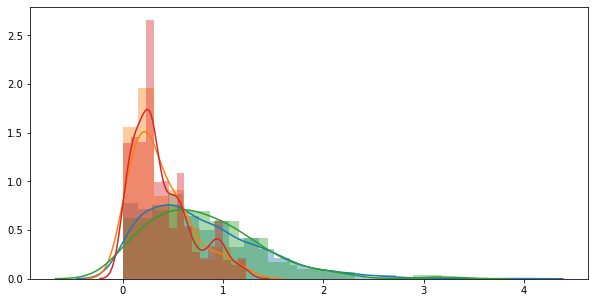

In [245]:
plt.figure(figsize = (10,5))
sns.distplot(X_no_2, hist = True , label = 'no - original')
sns.distplot(X_yes_2, hist = True , label = 'yes - original')

sns.distplot(data_no_undersampled2[:,0], hist = True , label = 'no - undersampled')
sns.distplot(data_yes_smote2[:,0], hist = True , label = 'yes - smote')
plt.show()

In [246]:
plt.figure(figsize = (10,5))
sns.distplot(X_no_2, hist = False , label = 'no - original')
sns.distplot(X_yes_2, hist = False , label = 'yes - original')
sns.distplot(data_yes_oversampled2[:,0], hist = False , label = 'yes - oversampled')
sns.distplot(data_no_undersampled2[:,0], hist = False , label = 'no - undersampled')
sns.distplot(data_yes_smote2[:,0], hist = False , label = 'yes - smote')
plt.xlabel('X')
plt.title('Sampling Methods - Data_2')
plt.savefig('./charts/data_2_sampling_methods')
plt.show()

# Logistic Regression with Sampling Methods

## Data 1

In [247]:
logreg3 = LogisticRegression()
logreg3.fit(X_oversampled, y_oversampled)
y_logreg3_predict = logreg3.predict(X)
confusion_matrix(y, y_logreg3_predict)

array([[828, 172],
       [ 16,  84]])

In [248]:
logreg4 = LogisticRegression()
logreg4.fit(X_undersampled, y_undersampled)
y_logreg4_predict = logreg4.predict(X)
confusion_matrix(y, y_logreg4_predict)

array([[841, 159],
       [ 16,  84]])

In [286]:
accuracy_score(y, y_logreg4_predict)

0.8409090909090909

In [287]:
balanced_accuracy_score(y, y_logreg4_predict)

0.8405

In [250]:
get_X_from_logreg(logreg4.coef_[0][0], logreg4.intercept_[0], 0.5)

5.965269927098845

In [251]:
logreg5 = LogisticRegression()
logreg5.fit(X_smote, y_smote)
y_logreg5_predict = logreg5.predict(X)
confusion_matrix(y, y_logreg5_predict)

array([[835, 165],
       [ 16,  84]])

In [288]:
accuracy_score(y, y_logreg5_predict)

0.8354545454545454

In [252]:
balanced_accuracy_score(y, y_logreg5_predict)

0.8374999999999999

In [253]:
get_X_from_logreg(logreg5.coef_[0][0], logreg5.intercept_[0], 0.5)

5.95231203036406

In [254]:
logreg7 = LogisticRegression()
logreg7.fit(X_manual_oversampled, y_manual_oversampled)
y_logreg7_predict = logreg7.predict(X)
confusion_matrix(y, y_logreg7_predict)

array([[834, 166],
       [ 16,  84]])

In [255]:
logreg_models = [logreg4, logreg5]
logreg_model_label = ['undersampled logreg', 'smote logreg' ]

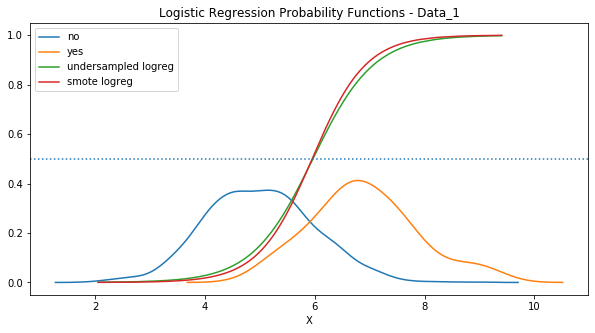

In [256]:
plt.figure(figsize = (10,5))
sns.distplot(X_no, hist = False , label = 'no')
sns.distplot(X_yes, hist = False , label = 'yes')
for i in range(0,len(logreg_models)):
    current_logreg = logreg_models[i]
    plt.plot(
        possible_thresholds, current_logreg.predict_proba(possible_thresholds)[:,1],
        label = logreg_model_label[i]
        )
#     plt.axvline(get_X_from_logreg(current_logreg.coef_[0][0], current_logreg.intercept_[0], 0.5))
plt.axhline(0.5, linestyle = ':')
plt.legend()
plt.xlabel('X')
plt.title('Logistic Regression Probability Functions - Data_1')
plt.savefig('./charts/data_1_sampling_method_logreg')

plt.show()

## Data 2

In [257]:
logreg4_2 = LogisticRegression()
logreg4_2.fit(X_undersampled2, y_undersampled2)
y_logreg4_2_predict = logreg4_2.predict(X_2)
confusion_matrix(y, y_logreg4_2_predict)

array([[575, 425],
       [ 24,  76]])

In [258]:
balanced_accuracy_score(y, y_logreg4_2_predict)

0.6675

In [259]:
get_X_from_logreg(logreg4_2.coef_[0][0], logreg4_2.intercept_[0], 0.5)

0.5599528908207847

In [260]:
logreg5_2 = LogisticRegression()
logreg5_2.fit(X_smote2, y_smote2)
y_logreg5_2_predict = logreg5_2.predict(X_2)
confusion_matrix(y, y_logreg5_2_predict)

array([[581, 419],
       [ 25,  75]])

In [261]:
balanced_accuracy_score(y, y_logreg5_2_predict)

0.6655

In [262]:
get_X_from_logreg(logreg5_2.coef_[0][0], logreg5_2.intercept_[0], 0.5)

0.548219781929279

In [263]:
logreg_models_2 = [logreg4_2, logreg5_2]
logreg_model_label_2 = ['undersampled logreg', 'smote logreg' ]

In [264]:
plt.figure(figsize = (10,5))
sns.distplot(X_no_2, hist = False , label = 'no')
sns.distplot(X_yes_2, hist = False , label = 'yes')
for i in range(0,len(logreg_models_2)):
    current_logreg = logreg_models_2[i]
    plt.plot(
        possible_thresholds_2, current_logreg.predict_proba(possible_thresholds_2)[:,1],
        label = logreg_model_label_2[i]
        )
#     plt.axvline(get_X_from_logreg(current_logreg.coef_[0][0], current_logreg.intercept_[0], 0.5))
plt.axhline(0.5, linestyle = ':')
plt.legend()
plt.xlabel('X')
plt.title('Logistic Regression Probability Functions - Data_2')
plt.savefig('./charts/data_2_sampling_method_logreg')

plt.show()

# Decision Tree

In [265]:
# entropy: p = n/N, q = 1-n
# E = -p*log2(p) - q * log2(q)

In [266]:
# gini: G = 1 - p^2 - q^2

## Data 1

In [267]:
# dtc = DecisionTreeClassifier(criterion = 'entropy',class_weight = {0:1, 1: 1})

# dtc.fit(X, y)

# dot_data = export_graphviz(dtc, out_file=None,   
#                        class_names=np.unique(y).astype('str'), 
#                        filled=True, rounded=True, special_characters=True)

# graph = pydotplus.graph_from_dot_data(dot_data)  

# Image(graph.create_png())

In [268]:
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 1, class_weight = {0:1, 1: 1})

dtc.fit(X, y)

print(confusion_matrix(y, dtc.predict(X)))
print(accuracy_score(y, dtc.predict(X)))

dot_data = export_graphviz(dtc, out_file=None,   
                       class_names=np.unique(y).astype('str'), 
                       filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)  

graph.write_png('./charts/data_1_dtree_basic.png')

Image(graph.create_png())

[[943  57]
 [ 34  66]]
0.9172727272727272


In [269]:
imbalanced_classifier_functions.entropy(1000/1100)

0.4394969869215134

In [270]:
imbalanced_classifier_functions.entropy(57 / (57 + 66))

0.9961344835095796

In [271]:
# we can map the entropy in the two groups by split, can use 
# manual_number_of_TN, manual_number_of_FN, manual_number_of_TP, manual_number_of_FP
# from manual section

In [272]:
entropies_average = imbalanced_classifier_functions.return_entropies(
    possible_thresholds, manual_number_of_TN, manual_number_of_FN, 
                            manual_number_of_FP, manual_number_of_TP)

In [273]:
ginis_average = imbalanced_classifier_functions.return_ginis(
    possible_thresholds, manual_number_of_TN, manual_number_of_FN, 
                            manual_number_of_FP, manual_number_of_TP)

In [274]:
plt.plot(possible_thresholds, entropies_average, label = 'entropy', color = current_palette[0])
plt.plot(possible_thresholds, ginis_average, label = 'gini', color = current_palette[1])
plt.legend()
plt.title('Weighted Average Gini and Entropy Based on Threshold')
plt.xlabel('X')
plt.savefig('./charts/data_1_gini_entropy')
plt.show()

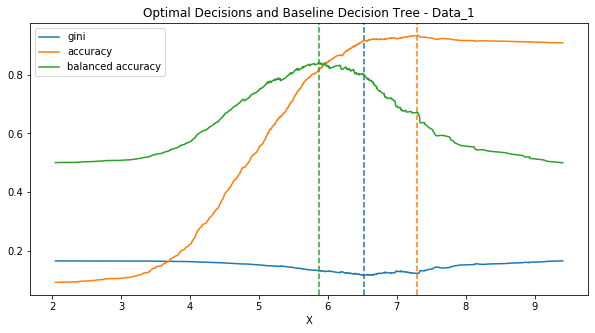

In [275]:
# plotting the entropies

plt.figure(figsize = (10,5))

plt.plot(possible_thresholds, ginis_average, label = 'gini', color = current_palette[0])
plt.axvline(possible_thresholds[np.argmin(ginis_average)], linestyle = '--', color = current_palette[0])

plt.plot(possible_thresholds,manual_accuracy, color = current_palette[1], label = 'accuracy')
plt.axvline(chosen_accuracy_threshold_manual, linestyle = '--', color = current_palette[1])

manual_balanced_accuracy

plt.plot(possible_thresholds,manual_balanced_accuracy, color = current_palette[2], label = 'balanced accuracy')
plt.axvline(chosen_balanced_accuracy_threshold_manual,linestyle = '--', color = current_palette[2])

plt.legend()

plt.title('Optimal Decisions and Baseline Decision Tree - Data_1')

plt.xlabel('X')

plt.savefig('./charts/data_1_baseline_gini')

plt.show()

In [276]:
possible_thresholds[np.argmin(entropies_average)]

array([6.52555676])

In [277]:
possible_thresholds[np.argmin(ginis_average)]

array([6.52555676])

In [278]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1, class_weight = {0:1, 1: 1})

dtc.fit(X, y)

dot_data = export_graphviz(dtc, out_file=None,   
                       class_names=np.unique(y).astype('str'), 
                       filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

[[815 185]
 [ 13  87]]
0.8425


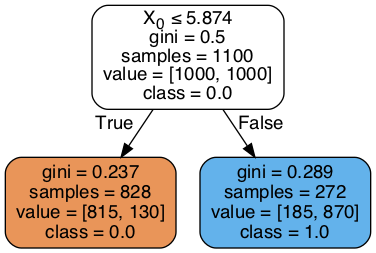

In [279]:
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 1, class_weight = {0:1, 1: 10})

dtc.fit(X, y)

print(confusion_matrix(y, dtc.predict(X)))
print(balanced_accuracy_score(y, dtc.predict(X)))

dot_data = export_graphviz(dtc, out_file=None,   
                       class_names=np.unique(y).astype('str'), 
                       filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_png('./charts/data_1_dtree_class_wegith.png')

Image(graph.create_png())

In [280]:
dtc.tree_.threshold[0]

5.874217748641968

### hpo - basic

In [133]:
param_grid = {
    'max_depth': [1,2,3,4,5],
    'min_samples_leaf': [1,2,3,4,5],
    'class_weight': [{0:1, 1: 1}, {0:1, 1: 10}]
    }
gscv_dt = GridSearchCV(estimator = dtc, param_grid = param_grid, scoring = 'accuracy', cv = 3)
gscv_dt.fit(X, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight={0: 1, 1: 10},
                                              criterion='gini', max_depth=1,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'

In [134]:
gscv_dt.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 1, 1: 1},
                       criterion='gini', max_depth=2, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

[[993   7]
 [ 65  35]]
0.9345454545454546
0.6715


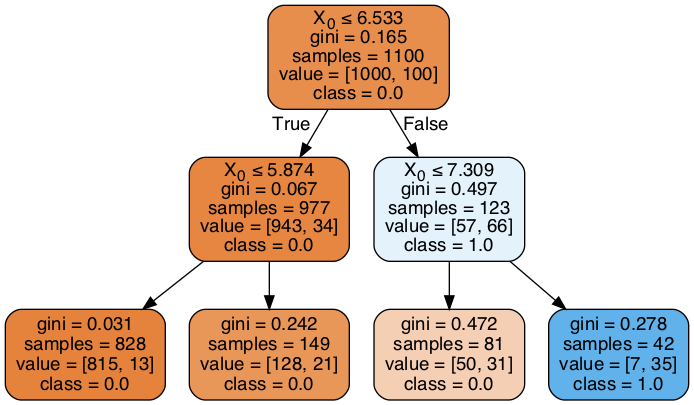

In [139]:
dtc = DecisionTreeClassifier(max_depth = gscv_dt.best_estimator_.max_depth,
                            min_samples_leaf = gscv_dt.best_estimator_.min_samples_leaf,
                            class_weight = gscv_dt.best_estimator_.class_weight)

dtc.fit(X, y)

print(confusion_matrix(y, dtc.predict(X)))
print(accuracy_score(y, dtc.predict(X)))
print(balanced_accuracy_score(y, dtc.predict(X)))

dot_data = export_graphviz(dtc, out_file=None,   
                       class_names=np.unique(y).astype('str'), 
                       filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_png('./charts/data_1_dtree_accuracy.png')

Image(graph.create_png())

In [140]:
param_grid = {
    'max_depth': [1,2,3,4,5],
    'min_samples_leaf': [1,2,3,4,5],
    'class_weight': [{0:1, 1: 1}, {0:1, 1: 10}]
    }
dtc = DecisionTreeClassifier()
gscv_dt = GridSearchCV(estimator = dtc, param_grid = param_grid, scoring = 'balanced_accuracy', cv = 3)
gscv_dt.fit(X, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10}],
      

[[815 185]
 [ 13  87]]
0.82
0.8425


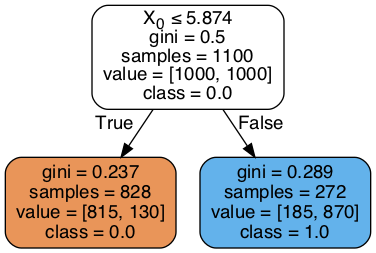

In [141]:
dtc = DecisionTreeClassifier(max_depth = gscv_dt.best_estimator_.max_depth,
                            min_samples_leaf = gscv_dt.best_estimator_.min_samples_leaf,
                            class_weight = gscv_dt.best_estimator_.class_weight)

dtc.fit(X, y)

print(confusion_matrix(y, dtc.predict(X)))
print(accuracy_score(y, dtc.predict(X)))
print(balanced_accuracy_score(y, dtc.predict(X)))

dot_data = export_graphviz(dtc, out_file=None,   
                       class_names=np.unique(y).astype('str'), 
                       filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_png('./charts/data_1_dtree_balanced_accuracy.png')

Image(graph.create_png())

### undersampled

In [150]:
param_grid = {
    'max_depth': [1,2,3,4,5],
    'min_samples_leaf': [1,2,3,4,5],
    'class_weight': [{0:1, 1: 1}, {0:1, 1: 10}]
    }
dtc = DecisionTreeClassifier()
gscv_dt = GridSearchCV(estimator = dtc, param_grid = param_grid, scoring = 'accuracy', cv = 3)
gscv_dt.fit(X_undersampled, y_undersampled);

[[797 203]
 [ 12  88]]
0.8045454545454546
0.8385


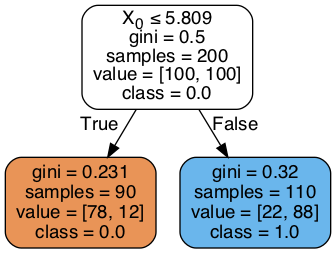

In [147]:
dtc = DecisionTreeClassifier(max_depth = gscv_dt.best_estimator_.max_depth,
                            min_samples_leaf = gscv_dt.best_estimator_.min_samples_leaf,
                            class_weight = gscv_dt.best_estimator_.class_weight)

dtc.fit(X_undersampled, y_undersampled)

print(confusion_matrix(y, dtc.predict(X)))
print(accuracy_score(y, dtc.predict(X)))
print(balanced_accuracy_score(y, dtc.predict(X)))

dot_data = export_graphviz(dtc, out_file=None,   
                       class_names=np.unique(y).astype('str'), 
                       filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_png('./charts/data_1_dtree_undersampled_accuracy.png')

Image(graph.create_png())

In [148]:
param_grid = {
    'max_depth': [1,2,3,4,5],
    'min_samples_leaf': [1,2,3,4,5],
    'class_weight': [{0:1, 1: 1}, {0:1, 1: 10}]
    }
dtc = DecisionTreeClassifier()
gscv_dt = GridSearchCV(estimator = dtc, param_grid = param_grid, scoring = 'balanced_accuracy', cv = 3)
gscv_dt.fit(X_undersampled, y_undersampled)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10}],
      

[[797 203]
 [ 12  88]]
0.8045454545454546
0.8385


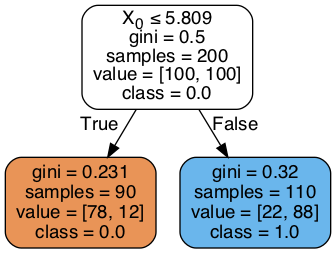

In [149]:
dtc = DecisionTreeClassifier(max_depth = gscv_dt.best_estimator_.max_depth,
                            min_samples_leaf = gscv_dt.best_estimator_.min_samples_leaf,
                            class_weight = gscv_dt.best_estimator_.class_weight)

dtc.fit(X_undersampled, y_undersampled)

print(confusion_matrix(y, dtc.predict(X)))
print(accuracy_score(y, dtc.predict(X)))
print(balanced_accuracy_score(y, dtc.predict(X)))

dot_data = export_graphviz(dtc, out_file=None,   
                       class_names=np.unique(y).astype('str'), 
                       filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_png('./charts/data_1_dtree_undersampled_balanced_accuracy.png')

Image(graph.create_png())

### smote

In [169]:
param_grid = {
    'max_depth': [1,2,3,4,5, 10, 20],
    'min_samples_leaf': [1,2,3,4,5, 10, 20],
    'class_weight': [{0:1, 1: 1}, {0:1, 1: 10}]
    }

[[821 179]
 [ 12  88]]
0.8263636363636364
0.8505


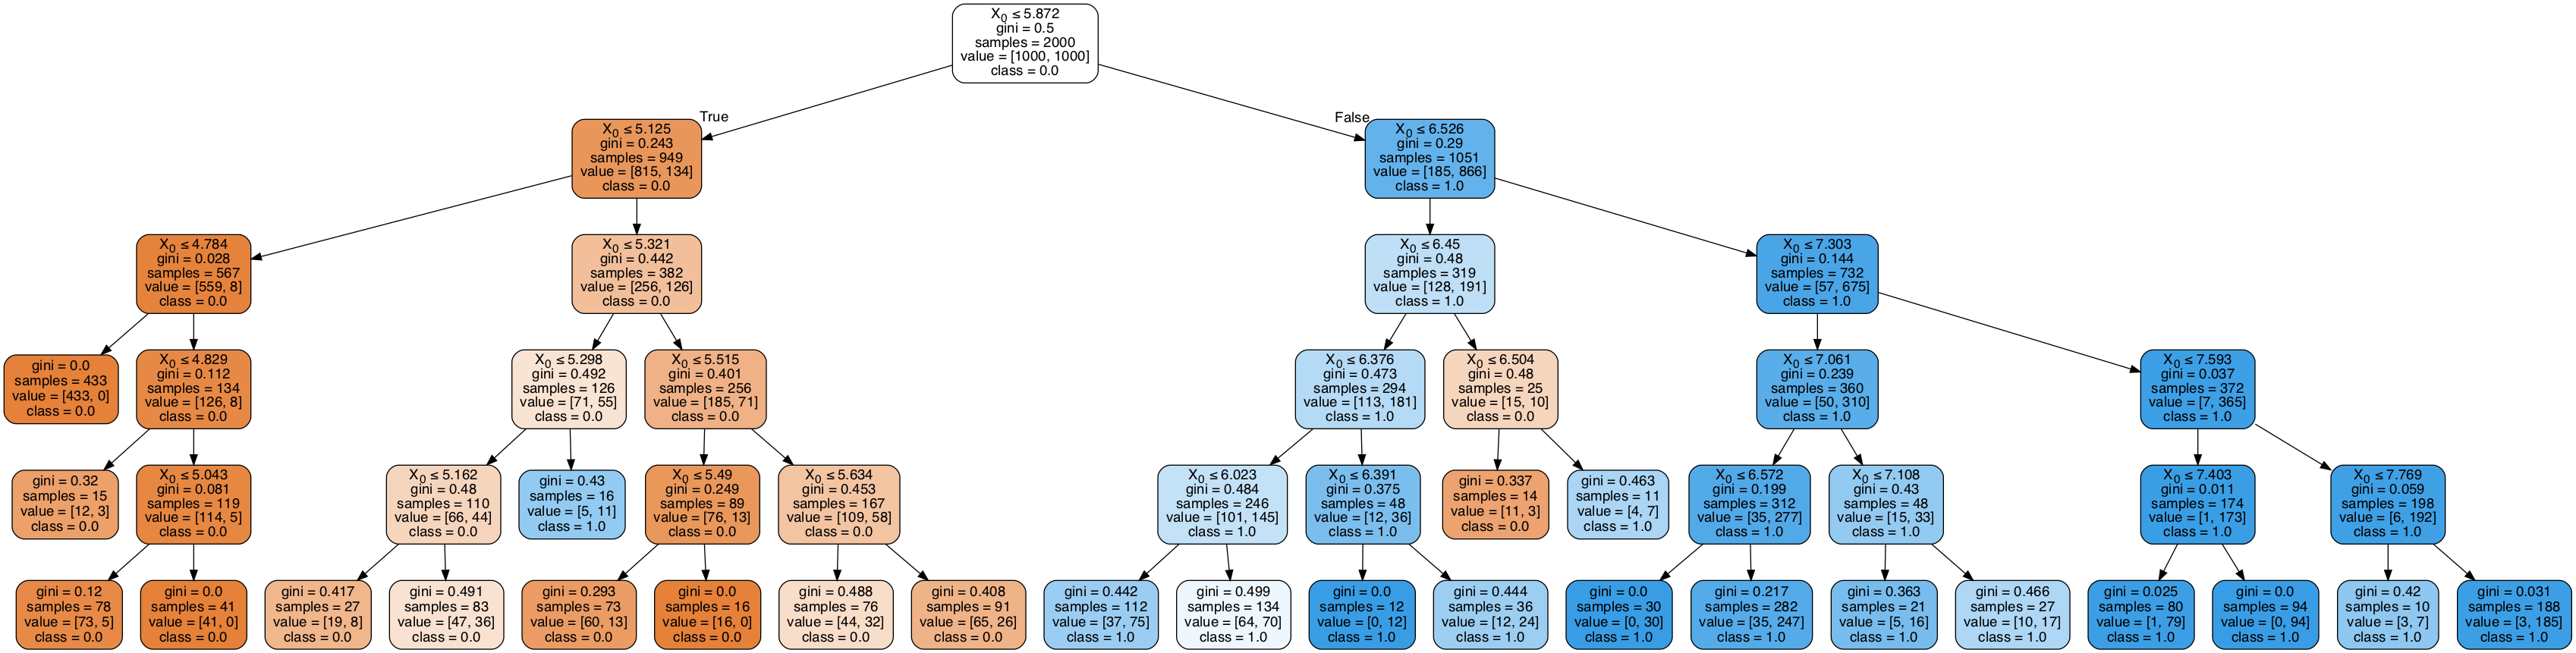

In [161]:
dtc = DecisionTreeClassifier()
gscv_dt = GridSearchCV(estimator = dtc, param_grid = param_grid, scoring = 'accuracy', cv = 3)
gscv_dt.fit(X_smote, y_smote)

dtc = DecisionTreeClassifier(max_depth = gscv_dt.best_estimator_.max_depth,
                            min_samples_leaf = gscv_dt.best_estimator_.min_samples_leaf,
                            class_weight = gscv_dt.best_estimator_.class_weight)

dtc.fit(X_smote, y_smote)

print(confusion_matrix(y, dtc.predict(X)))
print(accuracy_score(y, dtc.predict(X)))
print(balanced_accuracy_score(y, dtc.predict(X)))

dot_data = export_graphviz(dtc, out_file=None,   
                       class_names=np.unique(y).astype('str'), 
                       filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_png('./charts/data_1_dtree_smote_accuracy.png')

Image(graph.create_png())

[[821 179]
 [ 12  88]]
0.8263636363636364
0.8505


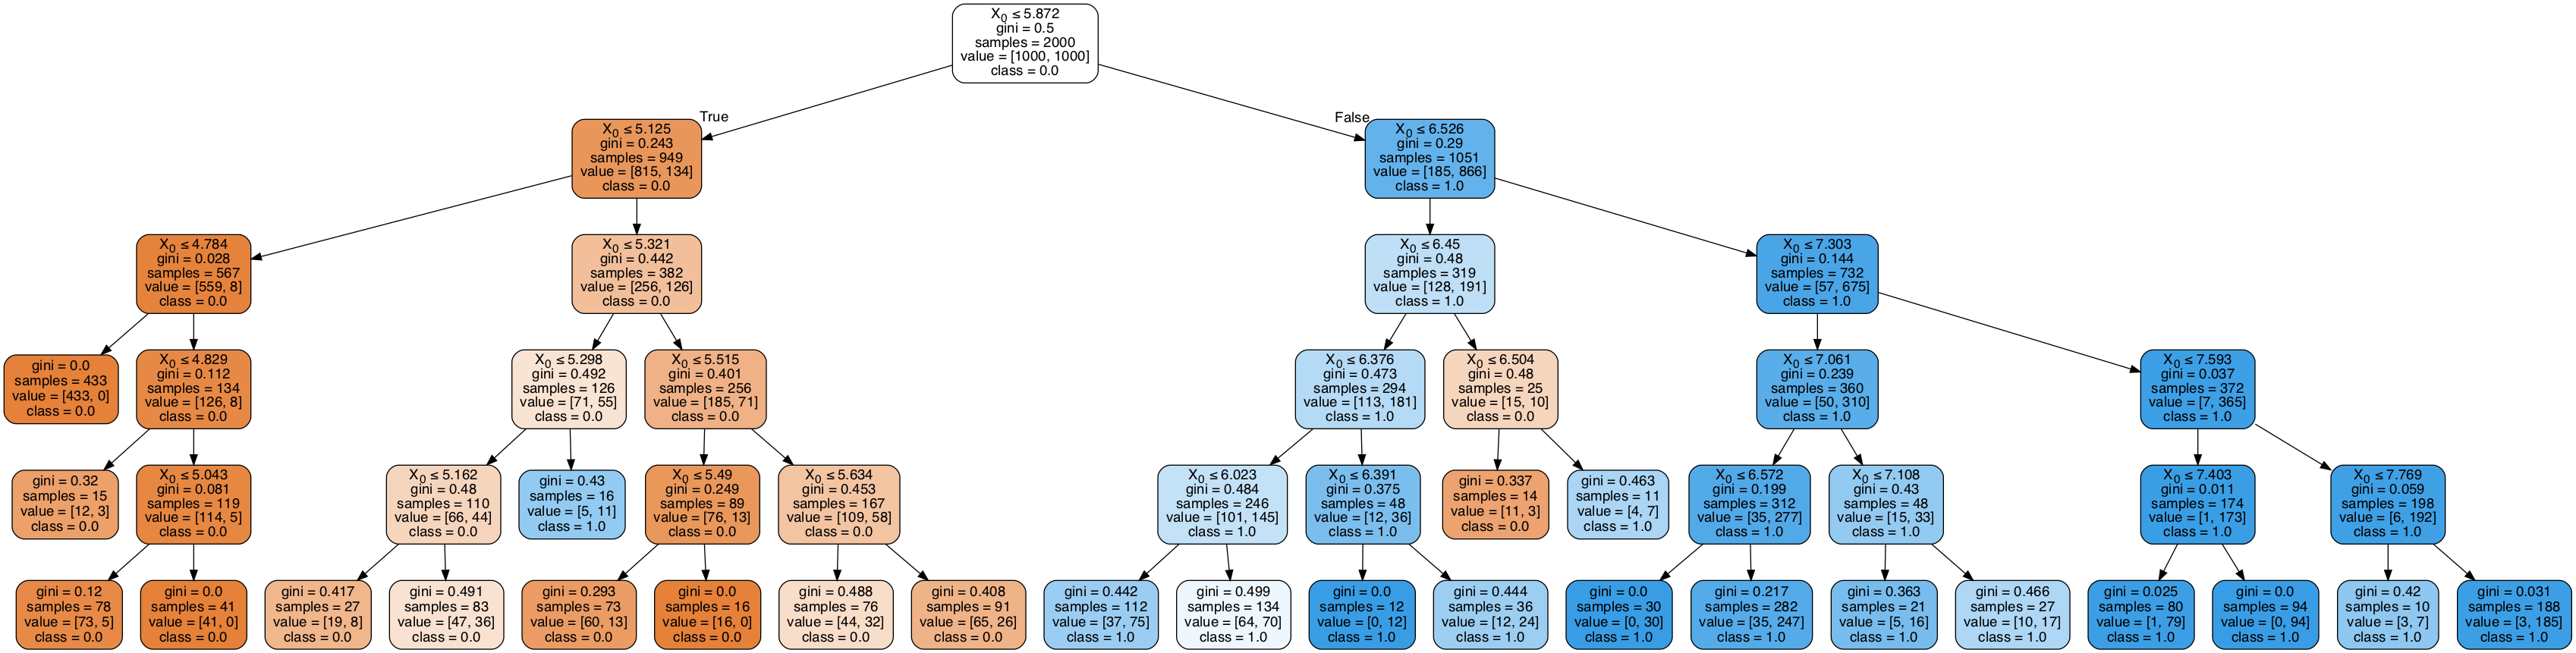

In [162]:
dtc = DecisionTreeClassifier()
gscv_dt = GridSearchCV(estimator = dtc, param_grid = param_grid, scoring = 'balanced_accuracy', cv = 3)
gscv_dt.fit(X_smote, y_smote)

dtc = DecisionTreeClassifier(max_depth = gscv_dt.best_estimator_.max_depth,
                            min_samples_leaf = gscv_dt.best_estimator_.min_samples_leaf,
                            class_weight = gscv_dt.best_estimator_.class_weight)

dtc.fit(X_smote, y_smote)

print(confusion_matrix(y, dtc.predict(X)))
print(accuracy_score(y, dtc.predict(X)))
print(balanced_accuracy_score(y, dtc.predict(X)))

dot_data = export_graphviz(dtc, out_file=None,   
                       class_names=np.unique(y).astype('str'), 
                       filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_png('./charts/data_1_dtree_smote_balanced_accuracy.png')

Image(graph.create_png())

## Data 2

### hpo - basic

[[1000    0]
 [ 100    0]]
0.9090909090909091
0.5


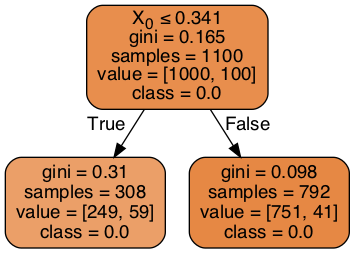

In [165]:
dtc = DecisionTreeClassifier()
gscv_dt = GridSearchCV(estimator = dtc, param_grid = param_grid, scoring = 'accuracy', cv = 3)
gscv_dt.fit(X_2, y)

dtc = DecisionTreeClassifier(max_depth = gscv_dt.best_estimator_.max_depth,
                            min_samples_leaf = gscv_dt.best_estimator_.min_samples_leaf,
                            class_weight = gscv_dt.best_estimator_.class_weight)

dtc.fit(X_2, y)

print(confusion_matrix(y, dtc.predict(X_2)))
print(accuracy_score(y, dtc.predict(X_2)))
print(balanced_accuracy_score(y, dtc.predict(X_2)))

dot_data = export_graphviz(dtc, out_file=None,   
                       class_names=np.unique(y).astype('str'), 
                       filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_png('./charts/data_2_dtree_baseline_accuracy.png')

Image(graph.create_png())

[[527 473]
 [ 12  88]]
0.5590909090909091
0.7035


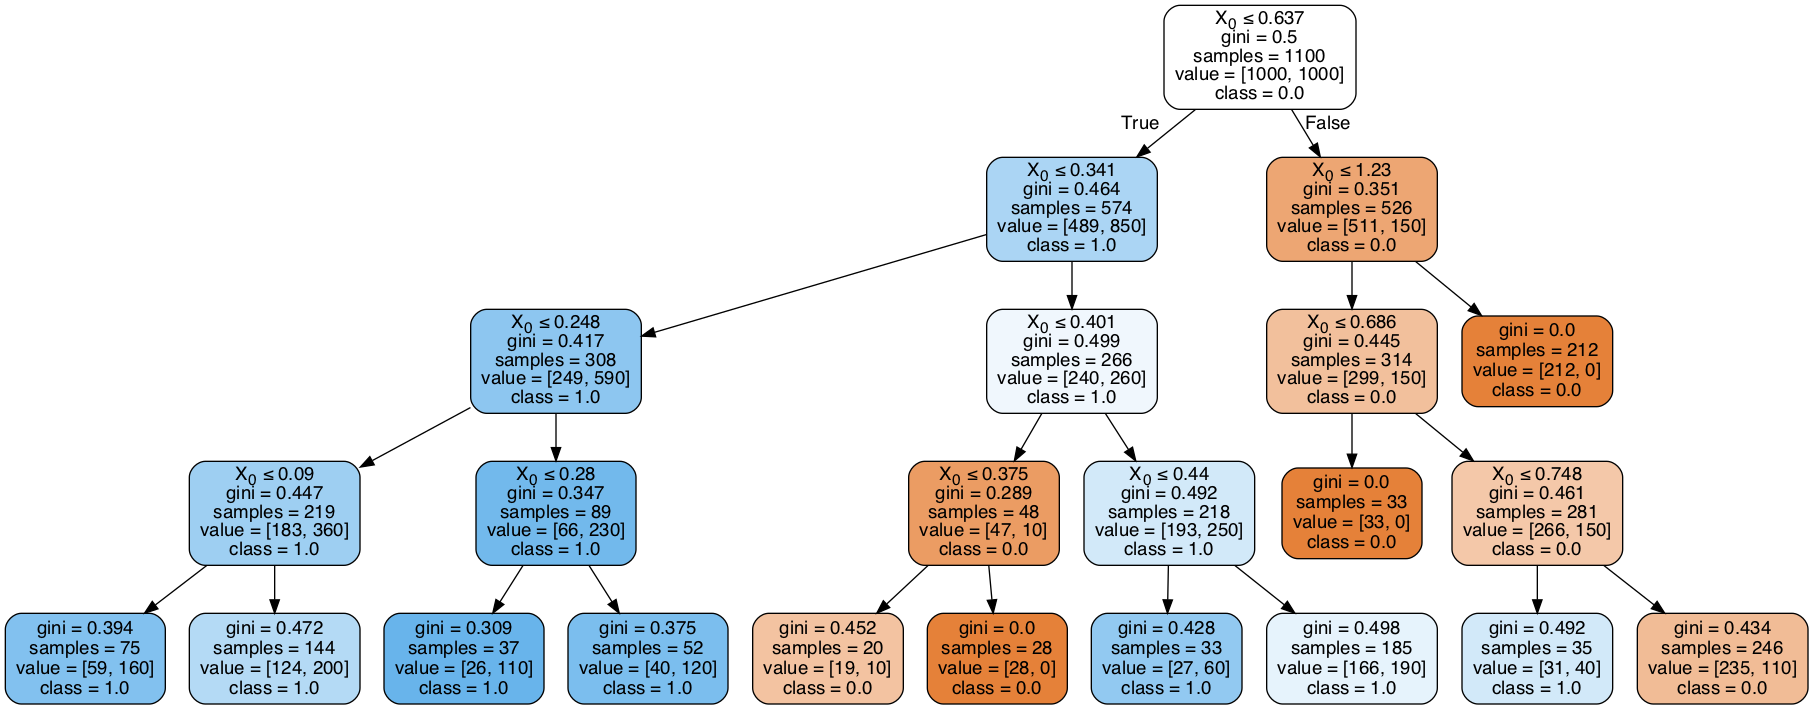

In [166]:
dtc = DecisionTreeClassifier()
gscv_dt = GridSearchCV(estimator = dtc, param_grid = param_grid, scoring = 'balanced_accuracy', cv = 3)
gscv_dt.fit(X_2, y)

dtc = DecisionTreeClassifier(max_depth = gscv_dt.best_estimator_.max_depth,
                            min_samples_leaf = gscv_dt.best_estimator_.min_samples_leaf,
                            class_weight = gscv_dt.best_estimator_.class_weight)

dtc.fit(X_2, y)

print(confusion_matrix(y, dtc.predict(X_2)))
print(accuracy_score(y, dtc.predict(X_2)))
print(balanced_accuracy_score(y, dtc.predict(X_2)))

dot_data = export_graphviz(dtc, out_file=None,   
                       class_names=np.unique(y).astype('str'), 
                       filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_png('./charts/data_2_dtree_baseline_balanced_accuracy.png')

Image(graph.create_png())

### undersampled

[[555 445]
 [ 17  83]]
0.58
0.6925


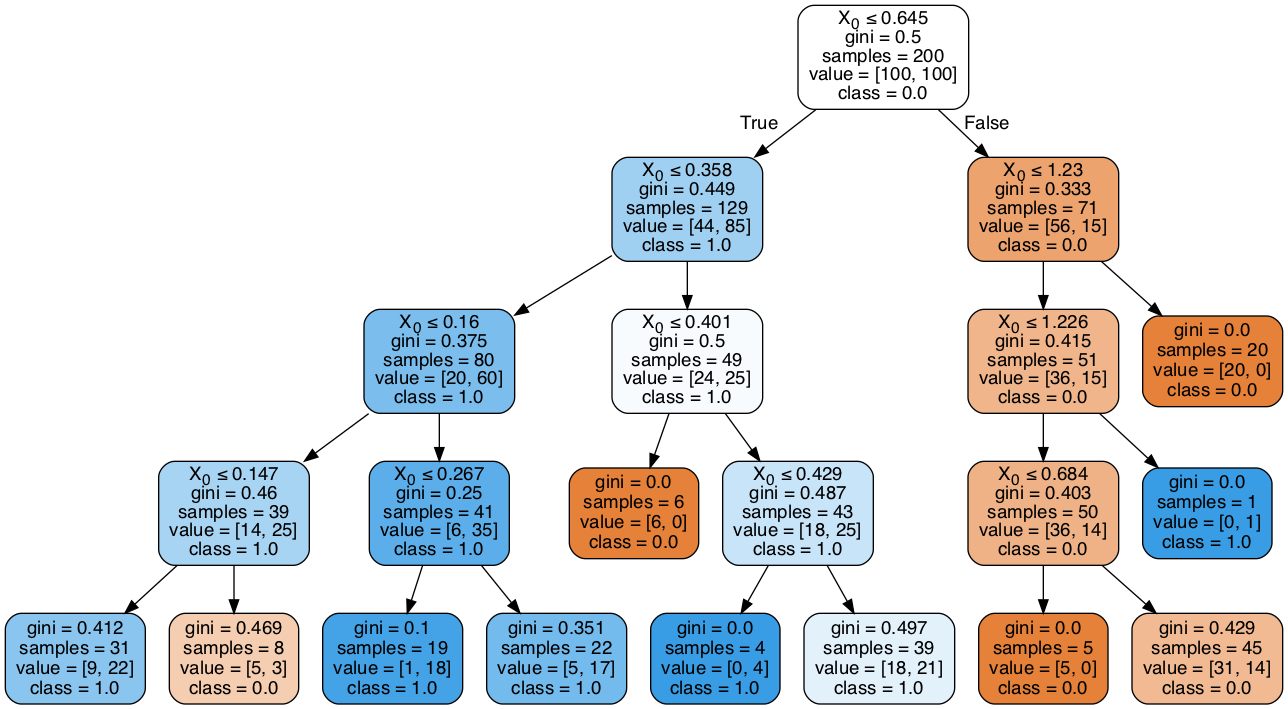

In [170]:
dtc = DecisionTreeClassifier()
gscv_dt = GridSearchCV(estimator = dtc, param_grid = param_grid, scoring = 'accuracy', cv = 3)
gscv_dt.fit(X_undersampled2, y_undersampled2)

dtc = DecisionTreeClassifier(max_depth = gscv_dt.best_estimator_.max_depth,
                            min_samples_leaf = gscv_dt.best_estimator_.min_samples_leaf,
                            class_weight = gscv_dt.best_estimator_.class_weight)

dtc.fit(X_undersampled2, y_undersampled2)

print(confusion_matrix(y, dtc.predict(X_2)))
print(accuracy_score(y, dtc.predict(X_2)))
print(balanced_accuracy_score(y, dtc.predict(X_2)))

dot_data = export_graphviz(dtc, out_file=None,   
                       class_names=np.unique(y).astype('str'), 
                       filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_png('./charts/data_2_dtree_undersampled_accuracy.png')

Image(graph.create_png())

[[555 445]
 [ 17  83]]
0.58
0.6925


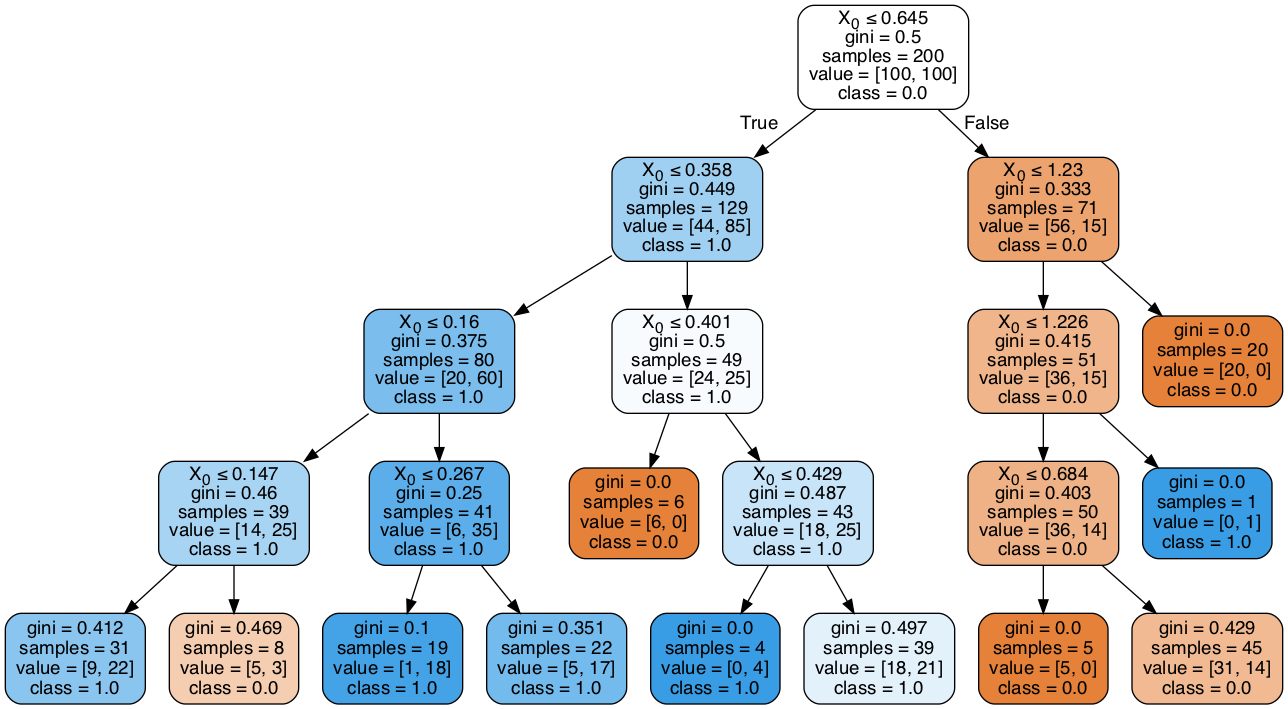

In [171]:
dtc = DecisionTreeClassifier()
gscv_dt = GridSearchCV(estimator = dtc, param_grid = param_grid, scoring = 'balanced_accuracy', cv = 3)
gscv_dt.fit(X_undersampled2, y_undersampled2)

dtc = DecisionTreeClassifier(max_depth = gscv_dt.best_estimator_.max_depth,
                            min_samples_leaf = gscv_dt.best_estimator_.min_samples_leaf,
                            class_weight = gscv_dt.best_estimator_.class_weight)

dtc.fit(X_undersampled2, y_undersampled2)

print(confusion_matrix(y, dtc.predict(X_2)))
print(accuracy_score(y, dtc.predict(X_2)))
print(balanced_accuracy_score(y, dtc.predict(X_2)))

dot_data = export_graphviz(dtc, out_file=None,   
                       class_names=np.unique(y).astype('str'), 
                       filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_png('./charts/data_2_dtree_undersampled_balanced_accuracy.png')

Image(graph.create_png())

### smote

[[669 331]
 [ 25  75]]
0.6763636363636364
0.7095


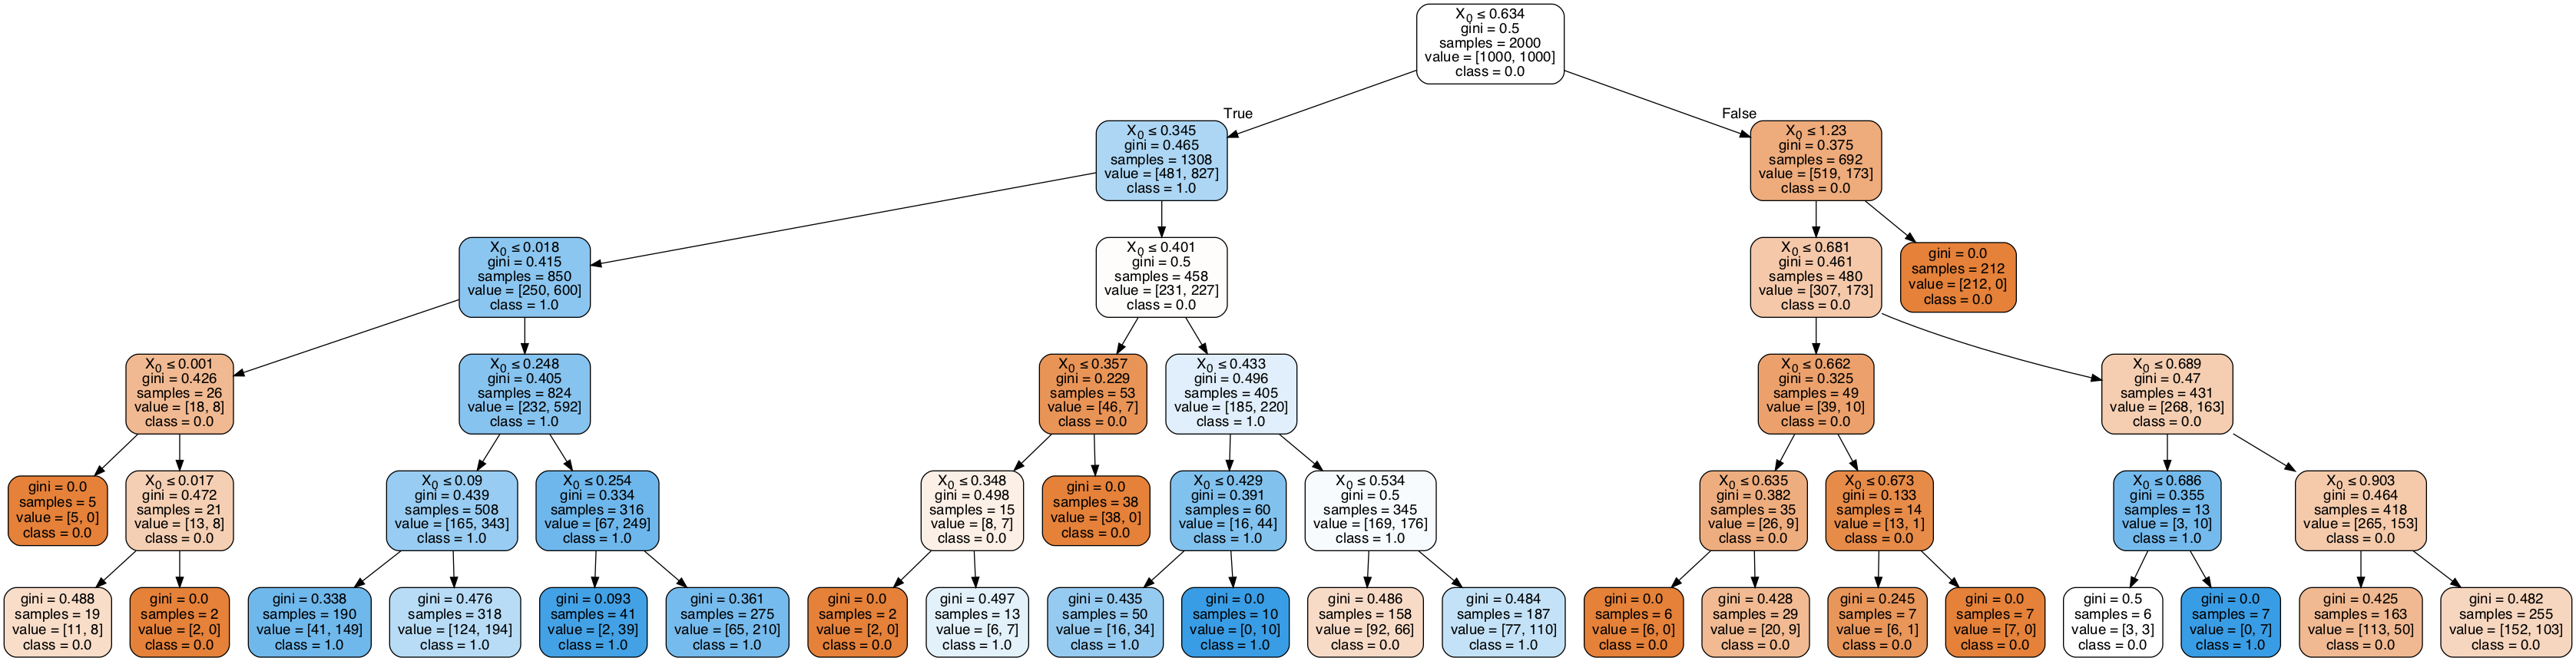

In [172]:
dtc = DecisionTreeClassifier()
gscv_dt = GridSearchCV(estimator = dtc, param_grid = param_grid, scoring = 'accuracy', cv = 3)
gscv_dt.fit(X_smote2, y_smote2)

dtc = DecisionTreeClassifier(max_depth = gscv_dt.best_estimator_.max_depth,
                            min_samples_leaf = gscv_dt.best_estimator_.min_samples_leaf,
                            class_weight = gscv_dt.best_estimator_.class_weight)

dtc.fit(X_smote2, y_smote2)

print(confusion_matrix(y, dtc.predict(X_2)))
print(accuracy_score(y, dtc.predict(X_2)))
print(balanced_accuracy_score(y, dtc.predict(X_2)))

dot_data = export_graphviz(dtc, out_file=None,   
                       class_names=np.unique(y).astype('str'), 
                       filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_png('./charts/data_2_dtree_smote_accuracy.png')

Image(graph.create_png())

[[669 331]
 [ 25  75]]
0.6763636363636364
0.7095


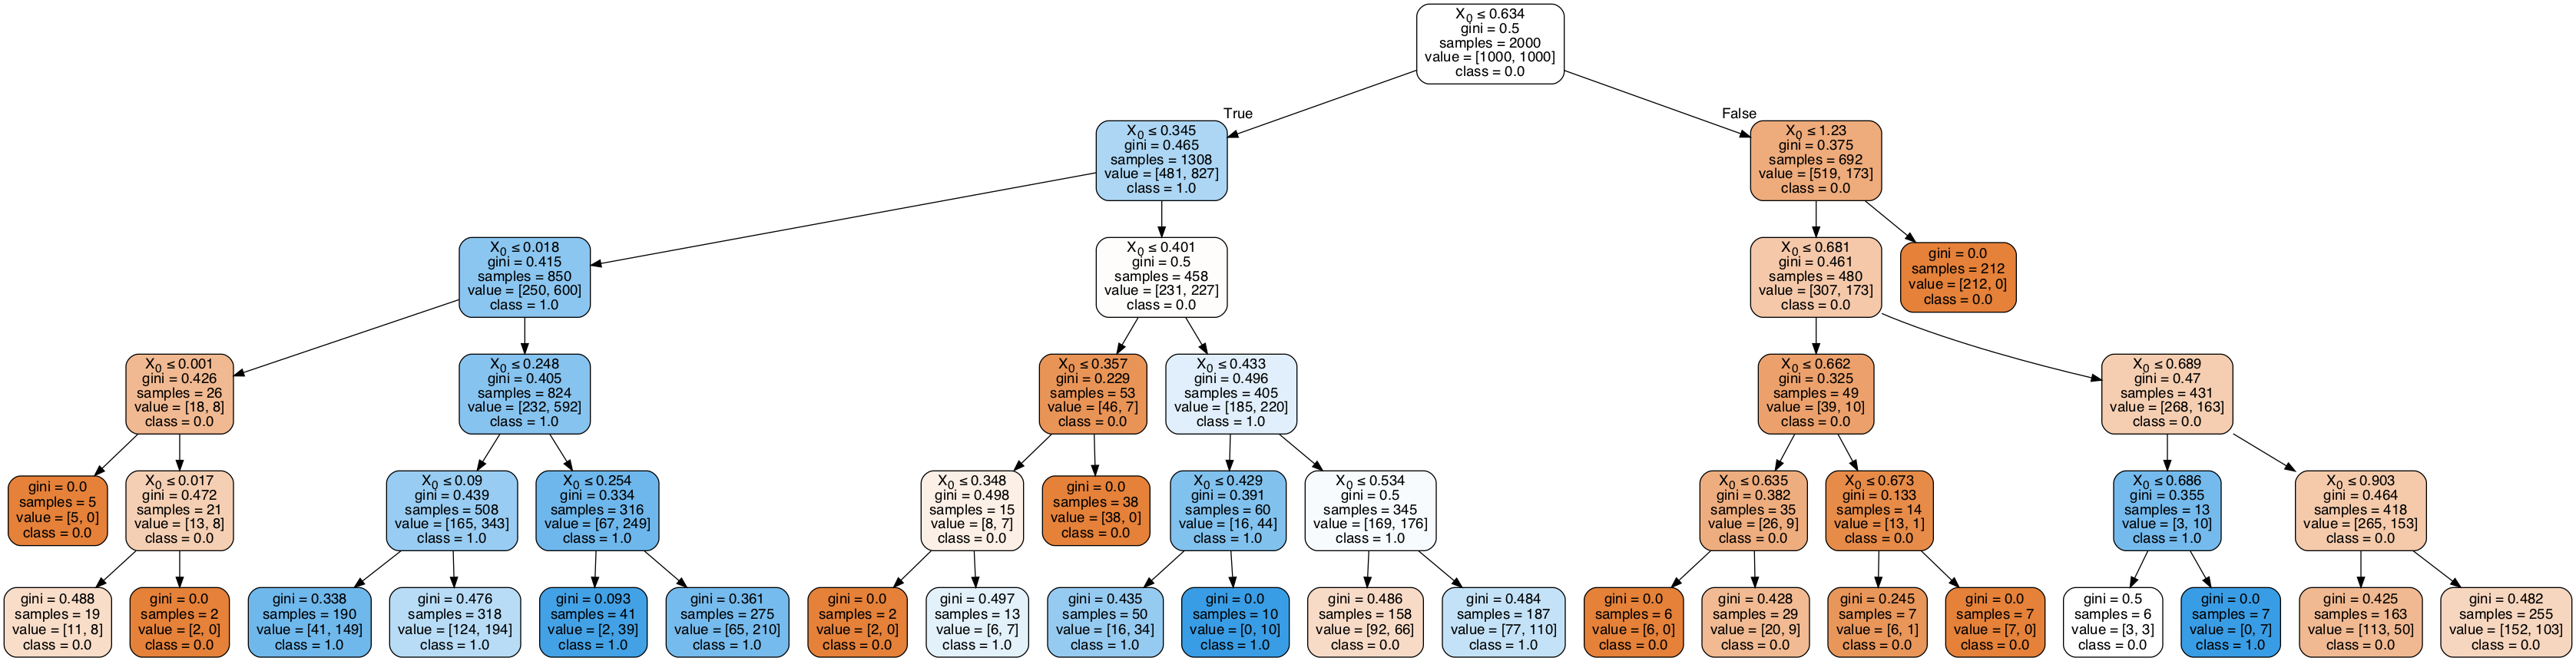

In [281]:
dtc = DecisionTreeClassifier()
gscv_dt = GridSearchCV(estimator = dtc, param_grid = param_grid, scoring = 'balanced_accuracy', cv = 3)
gscv_dt.fit(X_smote2, y_smote2)

dtc = DecisionTreeClassifier(max_depth = gscv_dt.best_estimator_.max_depth,
                            min_samples_leaf = gscv_dt.best_estimator_.min_samples_leaf,
                            class_weight = gscv_dt.best_estimator_.class_weight)

dtc.fit(X_smote2, y_smote2)

print(confusion_matrix(y, dtc.predict(X_2)))
print(accuracy_score(y, dtc.predict(X_2)))
print(balanced_accuracy_score(y, dtc.predict(X_2)))

dot_data = export_graphviz(dtc, out_file=None,   
                       class_names=np.unique(y).astype('str'), 
                       filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_png('./charts/data_2_dtree_smote_balanced_accuracy.png')

Image(graph.create_png())